# salt result viz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from hydroeval import evaluator, nse, rmse, pbias
import matplotlib.pyplot as plt
# import seaborn as sns
# from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

In [2]:
sys.path.insert(1, 'D:/spark-brc_gits/apexmf_git')

In [3]:
from apexmf import apexmf_pst_par, apexmf_utils
from apexmf import apexmf_pst_viz, apexmf_pst_utils
from apexmf.salt.analyzer import SaltAnalysis
from apexmf import analyzer

# Set Path

In [4]:
cwd = "D:/Projects/BLM/reports/report_230831_final"

In [5]:
ani_wd = "D:/Projects/Watersheds/Animas/Analysis/AMRSs/calibration/main_ies_1_pp_rw_ies_init_zero"

In [6]:
# ani_wd = "D:\Projects\Watersheds\Animas\Analysis\AMRSs\calibration\main_ies_1_pp_rw_ies_init_zero"
price_wd = "D:/Projects/Watersheds/Price/AMRSs/4 APEX-MODFLOW-Salt Final"
white_wd = "D:/Projects/Watersheds/White/Analysis/AMRSs/APEX-MODFLOW-Salt_wr"
ug_wd = "D:/Projects/Watersheds/Green/Analysis/AMRSs/salt_cal_230117/gr_012721/main_ies_1_pp_rw_ies"
dol_wd = "D:/Projects/Watersheds/Dolores/Analysis/AMRSs/main_ies_1_pp_rw_ies"
gu_wd = "D:/Projects/Watersheds/Gunnison/Analysis/AMRSs/main_ies_rw"

sub_ids = [75, 163, 66, 199, 1, 64]
rch_fnams = [f"SITE{sub_id}.RCH" for sub_id in sub_ids]
obd_col_nams = ["str_075", "sub_163", "sub066", "sub199", "sub001", "sub0064"]

tot_wds = [ani_wd, price_wd, white_wd, ug_wd, dol_wd, gu_wd]
st_dates = ["1/1/1987", "1/1/1990", "1/1/1985", "1/1/1995", "1/1/1987", "1/1/2007"]
cal_st_dates = ["1/1/1992", "1/1/1995", "1/1/1990", "1/1/2000", "1/1/1992", "1/1/2009"]
cal_ed_dates = ["12/31/2011", "12/31/2015", "12/31/2019", "12/31/2019", "12/31/2011", "12/31/2015"]
names = ['Animas', 'Price', 'White', 'Upper Green','Dolores', 'Gunnison']

# os.chdir(wd)

# Groundwater

In [7]:
gwd = "D:/Projects/BLM/reports/report_230831_final"

In [8]:
os.chdir(gwd)

In [9]:
gw_df = pd.read_excel("tot_gw.xlsx",
            usecols=["Measured", "Modelled", "ws"],
            )

In [10]:
gw_df

,Measured,Modelled,ws
0,-31.09,-27.960000,Animas
1,-30.30,-28.000000,Animas
2,-30.14,-28.030000,Animas
3,-29.92,-28.080000,Animas
4,-30.37,-28.130000,Animas
...,...,...,...
6587,-16.80,-6.768066,Price
6588,-11.90,-6.768066,Price
6589,-19.80,-6.843896,Price
6590,-12.80,-6.843896,Price


In [11]:
gw_df.rename(columns={'Measured': 'obd', 'Modelled': 'sim', 'ws':'type'}, inplace=True)

In [12]:
from apexmf import analyzer

In [13]:
gw_df.rename(columns={'obd': 'obd', 'Modelled': 'sim', 'ws':'type'}, inplace=True)

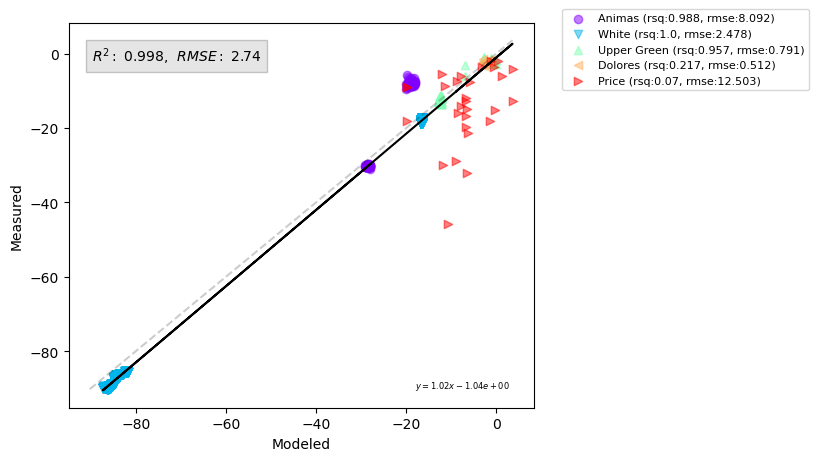

In [14]:
analyzer.plot_one_one(gw_df, alpha=0.5, fignam="dtw.jpg")

# salt

## Ani

In [15]:
md = SaltAnalysis(tot_wds[0])
df = md.load_salt_outlet_result()
tot_salt_df = md.get_tot_salt_outlet(df, st_dates[0], cal_st_dates[0])
tot_salt_df = tot_salt_df.resample('M').mean()

salt_obd = pd.read_csv('salt_075_mon.obd', sep='\t', index_col=0, parse_dates=True)
salt_obd['tot_salt_obd'] = salt_obd.iloc[:, :].sum(axis=1)
salt_obd.drop(salt_obd.iloc[:, :-1], inplace=True, axis=1)

ani_sim_obd = pd.concat([tot_salt_df, salt_obd], axis=1).dropna()
ani_sim_obd["type"] = "Animas"

## Upper Green

In [16]:
md = SaltAnalysis(tot_wds[3])
df = md.load_salt_outlet_result()
tot_salt_df = md.get_tot_salt_outlet(df, st_dates[3], cal_st_dates[3])
tot_salt_df = tot_salt_df.resample('M').mean()

salt_obd = pd.read_csv('salt_199_mon.obd.csv', index_col=0, parse_dates=True, na_values=-999)
salt_obd = salt_obd.iloc[:, -8:]
salt_obd['tot_salt_obd'] = salt_obd.iloc[:, :].sum(axis=1, min_count=1)
salt_obd.drop(salt_obd.iloc[:, :-1], inplace=True, axis=1)

ug_sim_obd = pd.concat([tot_salt_df, salt_obd], axis=1).dropna()
ug_sim_obd["type"] = "Upper Green"

## Dolores

In [17]:
md = SaltAnalysis(tot_wds[4])
df = md.load_salt_cha_result()
tot_salt_df = md.read_salt_sim_cha(df, 38, st_dates[4], cal_st_dates[4])
tot_salt_df = tot_salt_df.iloc[:, :8].resample('M').mean()
tot_salt_df["tot_salt_loads"] = tot_salt_df.sum(axis=1)
tot_salt_df.drop(tot_salt_df.iloc[:, :-1], inplace=True, axis=1)

salt_obd = pd.read_csv('salt_038_mon.obd', sep="\t", index_col=0, parse_dates=True, na_values=-999)
salt_obd = salt_obd.iloc[:, -8:]
salt_obd['tot_salt_obd'] = salt_obd.iloc[:, :].sum(axis=1, min_count=1)
salt_obd.drop(salt_obd.iloc[:, :-1], inplace=True, axis=1)

dol_sim_obd = pd.concat([tot_salt_df, salt_obd], axis=1).dropna()
dol_sim_obd["type"] = "Dolores"


## Gunnision

In [18]:
md = SaltAnalysis(tot_wds[5])
df = md.load_salt_outlet_result()
tot_salt_df = md.get_tot_salt_outlet(df,st_dates[5], cal_st_dates[5])
tot_salt_df = tot_salt_df.resample('M').mean()

salt_obd = pd.read_csv('salt_064_mon.obd', sep="\t", index_col=0, parse_dates=True, na_values=-999)
salt_obd['tot_salt_obd'] = salt_obd.iloc[:, :].sum(axis=1, min_count=1)
salt_obd.drop(salt_obd.iloc[:, :-1], inplace=True, axis=1)

gn_sim_obd = pd.concat([tot_salt_df, salt_obd], axis=1).dropna()
gn_sim_obd["type"] = "Gunnison"


## Price

In [19]:
md = SaltAnalysis(tot_wds[1])
df = md.load_salt_outlet_result()
tot_salt_df = md.get_tot_salt_outlet(df,st_dates[1], cal_st_dates[1])
tot_salt_df = tot_salt_df.resample('M').mean()


salt_obd = pd.read_csv('salt_163_mon.obd.csv', index_col=0, parse_dates=True, na_values=-999)
salt_obd = salt_obd.iloc[:, -6:]
salt_obd['tot_salt_obd'] = salt_obd.iloc[:, :].sum(axis=1, min_count=1)
salt_obd.drop(salt_obd.iloc[:, :-1], inplace=True, axis=1)

price_sim_obd = pd.concat([tot_salt_df, salt_obd], axis=1).dropna()
price_sim_obd["type"] = "Price"


## White

In [20]:
md = SaltAnalysis(tot_wds[2])
df = md.load_salt_outlet_result()
tot_salt_df = md.get_tot_salt_outlet(df,st_dates[2], cal_st_dates[2])
tot_salt_df = tot_salt_df.resample('M').mean()


salt_obd = pd.read_csv('salt_066_mon.obd.csv', index_col=0, parse_dates=True, na_values=-999)
salt_obd = salt_obd.iloc[:, -6:]
salt_obd['tot_salt_obd'] = salt_obd.iloc[:, :].sum(axis=1, min_count=1)
salt_obd.drop(salt_obd.iloc[:, :-1], inplace=True, axis=1)

white_sim_obd = pd.concat([tot_salt_df, salt_obd], axis=1).dropna()
white_sim_obd["type"] = "White"

# Total

In [21]:
tot_salt = pd.concat([ani_sim_obd, ug_sim_obd, dol_sim_obd, gn_sim_obd, price_sim_obd, white_sim_obd], axis=0)

In [22]:
tot_salt

,tot_salt_loads,tot_salt_obd,type
1992-01-31,192387.031213,3.668970e+05,Animas
1992-03-31,273260.567640,5.158200e+05,Animas
1992-05-31,236583.118034,1.064525e+06,Animas
1992-08-31,187478.309092,5.397970e+05,Animas
1992-11-30,187494.579566,4.205740e+05,Animas
...,...,...,...
2018-12-31,5995.945139,2.228342e+05,White
2019-02-28,5709.925284,2.677167e+05,White
2019-05-31,65420.709188,6.826025e+05,White
2019-06-30,119076.607774,7.496315e+05,White


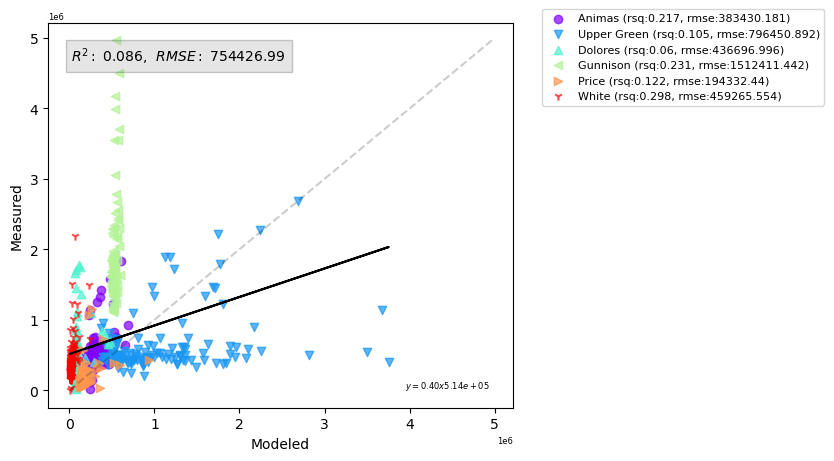

In [23]:
analyzer.plot_one_one(tot_salt, simnam="tot_salt_loads", obdnam="tot_salt_obd", fignam="salt.jpg")

In [24]:
ftot_salt = analyzer.filter_data(tot_salt, simnam="tot_salt_loads", obdnam="tot_salt_obd", pthreshold=80)

In [25]:
ftot_salt

,tot_salt_loads,tot_salt_obd,type
1992-01-31,192387.031213,3.668970e+05,Animas
1992-03-31,273260.567640,5.158200e+05,Animas
1992-05-31,236583.118034,1.064525e+06,Animas
1992-08-31,187478.309092,5.397970e+05,Animas
1992-11-30,187494.579566,4.205740e+05,Animas
...,...,...,...
1991-05-31,91138.395242,4.442785e+05,White
2010-03-31,109183.571024,4.120980e+05,White
2010-06-30,106580.181898,4.462444e+05,White
2014-05-31,243351.377534,7.233627e+05,White


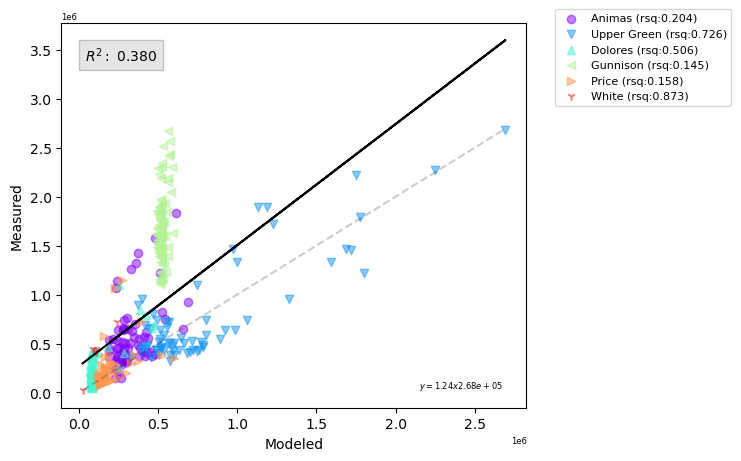

In [27]:
analyzer.plot_one_one(ftot_salt, simnam="tot_salt_loads", obdnam="tot_salt_obd", alpha=0.5, showrmse=False, fignam="salt.jpg")

In [28]:
os.getcwd()

'D:\\Projects\\Watersheds\\White\\Analysis\\AMRSs\\APEX-MODFLOW-Salt_wr'